<a href="https://colab.research.google.com/github/syedmuneeb321/LangGraph-Explorations/blob/main/Getting_Started_With_LangGraph/agent_chat_bot_with_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_google_genai tavily-python langchain_community

In [ ]:
import os
from google.colab import userdata

os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = userdata.get('LANGCHAIN_PROJECT')

gemini_api_key = userdata.get('GOOGLE_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain_core.output_parsers import StrOutputParser
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=2)
tools = [tool]


In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


In [ ]:
def chat_bot(state:State)->State:
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition

tool_node = ToolNode(tools)

In [ ]:
graph_builder.add_node("chat_bot",chat_bot)
graph_builder.add_node("tools",tool_node)

graph_builder.add_edge(START,"chat_bot")
graph_builder.add_conditional_edges("chat_bot",tools_condition)
graph_builder.add_edge("tools","chat_bot")

app = graph_builder.compile()

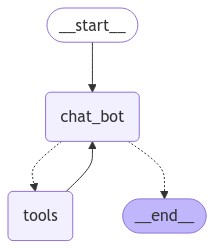

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def start_conversation(input:str)->None:
  input_messages = [("user",input)]
  for event in app.stream({"messages":input_messages}):
    for value in event.values():
      print(value["messages"][-1].content)



In [ ]:
start_conversation(input("enter a query"))

enter a querytell me about current weather in usa

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Concord Regional Airport', 'region': 'Concord', 'country': 'United States of America', 'lat': 35.3856010437012, 'lon': -80.7109985351563, 'tz_id': 'America/New_York', 'localtime_epoch': 1730557509, 'localtime': '2024-11-02 10:25'}, 'current': {'last_updated_epoch': 1730556900, 'last_updated': '2024-11-02 10:15', 'temp_c': 17.9, 'temp_f': 64.2, 'is_day': 1, 'condition': {'text': 'Overcast', 'icon': '//cdn.weatherapi.com/weather/64x64/day/122.png', 'code': 1009}, 'wind_mph': 9.2, 'wind_kph': 14.8, 'wind_degree': 65, 'wind_dir': 'ENE', 'pressure_mb': 1027.0, 'pressure_in': 30.32, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 58, 'cloud': 100, 'feelslike_c': 17.9, 'feelslike_f': 64.2, 'windchill_c': 16.3, 'windchill_f': 61.3, 'heatindex_c': 16.4, 'heatindex_f': 61.6, 'dewpoint_c': 9.5, 'dewpoint_f': 49.1, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 0.1, 'gust_mph': 12

In [ ]:
while True:
  query = input("enter a query")

  if query == "exit":
    break
  start_conversation(query)


enter a querytell me current weather in lahore in C
I am sorry, I cannot fulfill this request. I do not have access to real-time information, including weather data. 

enter a querytell me current weather in karachi

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Karachi', 'region': 'Sindh', 'country': 'Pakistan', 'lat': 24.8667, 'lon': 67.05, 'tz_id': 'Asia/Karachi', 'localtime_epoch': 1730557634, 'localtime': '2024-11-02 19:27'}, 'current': {'last_updated_epoch': 1730556900, 'last_updated': '2024-11-02 19:15', 'temp_c': 29.2, 'temp_f': 84.6, 'is_day': 0, 'condition': {'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 10.3, 'wind_kph': 16.6, 'wind_degree': 252, 'wind_dir': 'WSW', 'pressure_mb': 1012.0, 'pressure_in': 29.88, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 70, 'cloud': 0, 'feelslike_c': 32.5, 'feelslike_f': 90.6, 'windchill_c': 28.2, 'windchill_f': 82.8, 'heatindex_c': 30.7, 'heatindex_f':